In [1]:
import random

In [2]:
import matplotlib as mpl
mpl.use('pdf')

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.rc('font', family='serif', serif='Palatino')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# fig, ax = plt.subplots()
# fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)


In [6]:
T_MAX = 20
INTENSITY = 0.5  # rate parameter of the exp-distribution

In [7]:
def plot_poi_proc(intensity, t_max, random_state, width=5.51, height=4, fname="poi_proc"):
    """
    Parameters
    ----------
    intensity : float
        Intensity of the Poisson process.
    t_max : float
        The plotted time horizon will be `[0, t_max]`.
    random_state : int
        Random seed.
    """
    np.random.seed(random_state)
    waiting_times = np.random.exponential(scale=1/intensity,
                                          size=100)
    jump_times = np.cumsum(waiting_times)
    n_jumps_before_t_max = sum(jump_times<t_max)
    jump_times_head = jump_times[:n_jumps_before_t_max+1]
    jump_times_and_zero = np.concatenate(([0], jump_times_head))
    # plot
    plt.figure(dpi=300, figsize=(width, height))
    plt.title("Poisson process with intensity 0.5")
    plt.xlim(0, t_max)
    plt.xticks(np.linspace(0, t_max, 5))
    plt.xlabel("$t$")
    plt.ylabel("$N_t$")
    # lines in the plot
    plt.hlines(np.arange(len(jump_times_head)),
               jump_times_and_zero[:-1],
               jump_times_head,
               color="C0")
    # dots in the plot
    plt.plot(jump_times_and_zero,
             np.arange(len(jump_times_head)+1),
             linestyle='None',
             marker="o")
    print("seed:", random_state)
    plt.savefig(fname + ".pdf")

seed: 123


/home/akarakas/Schreibtisch/Masterarbeit/venv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


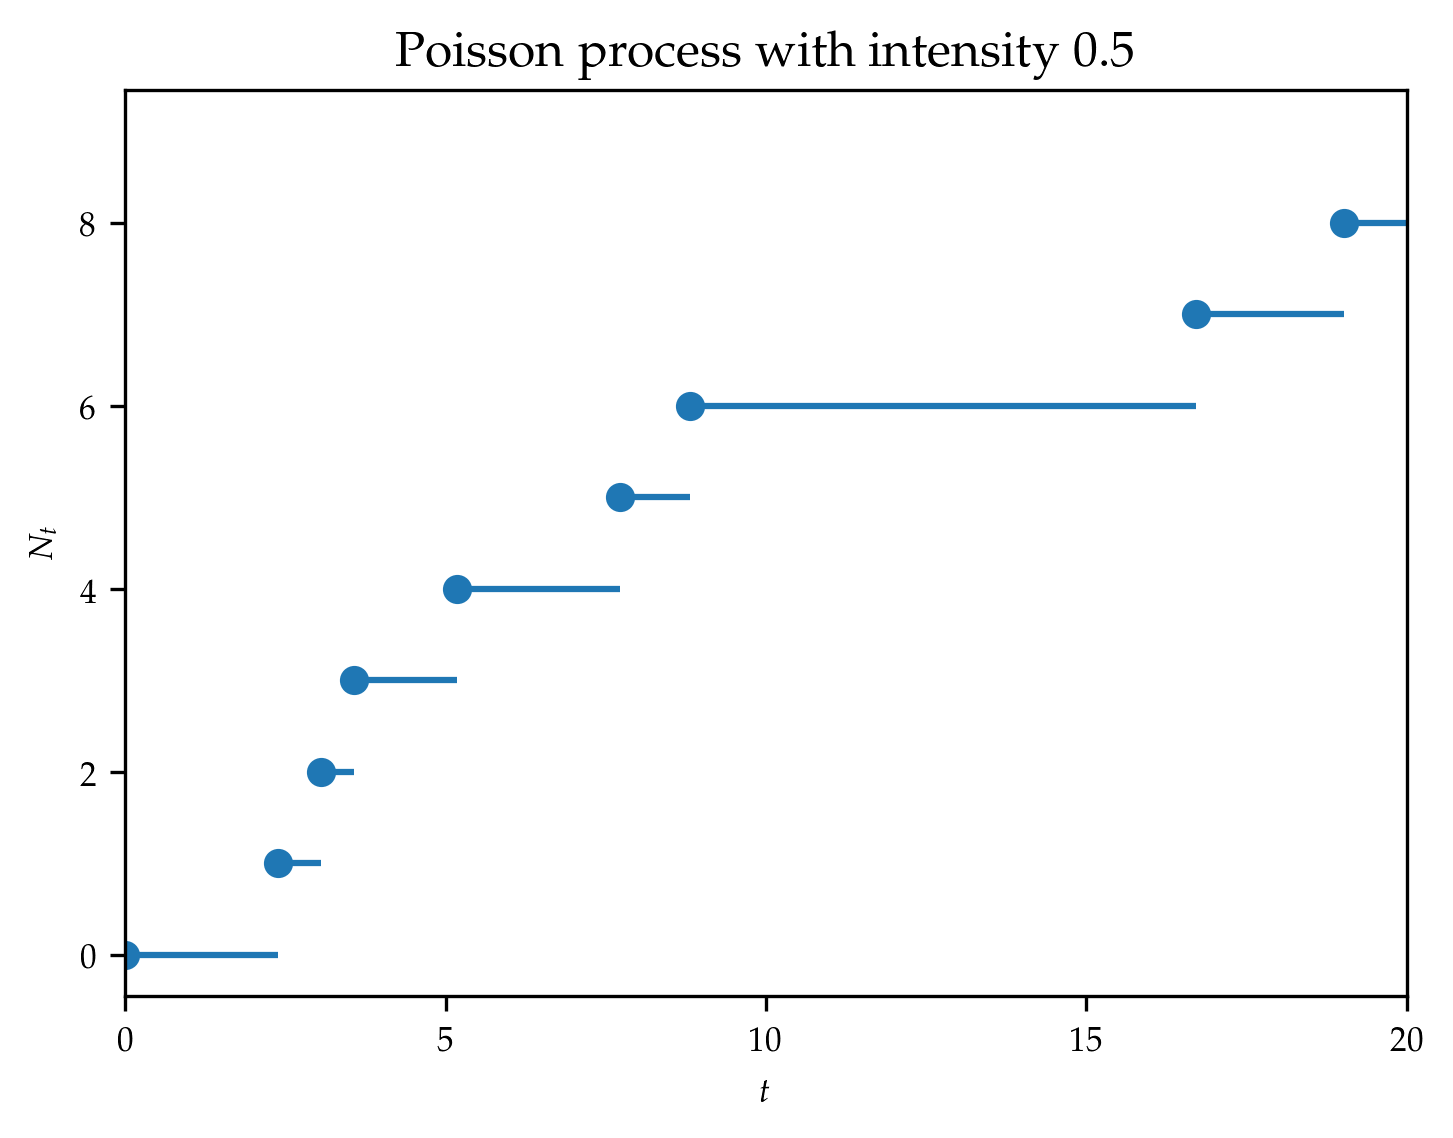

In [8]:
plot_poi_proc(INTENSITY, T_MAX, random_state=123)